# Principal Component Analysis

## import library

In [228]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [229]:
fname_data = 'assignment_12_data.txt'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]
#print(feature)
#print(x)
#print(y)
number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

## plot the input data

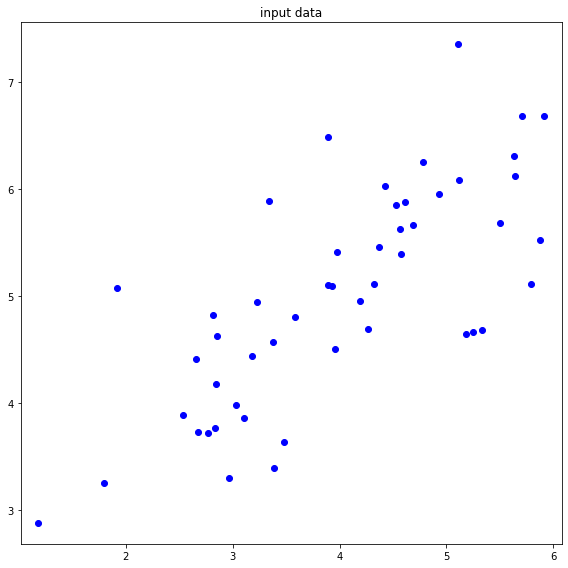

In [230]:
plt.figure(figsize=(8,8))   
plt.title('input data')


plt.scatter(x,y, c="b", marker="o")


plt.axis('equal')
plt.tight_layout()
plt.show()

## Normalization (Z-scoring)

mean of x =  3.989265199999999
mean of y =  5.002806
std of x =  1.161260585149156
std of y =  1.0131222834742113


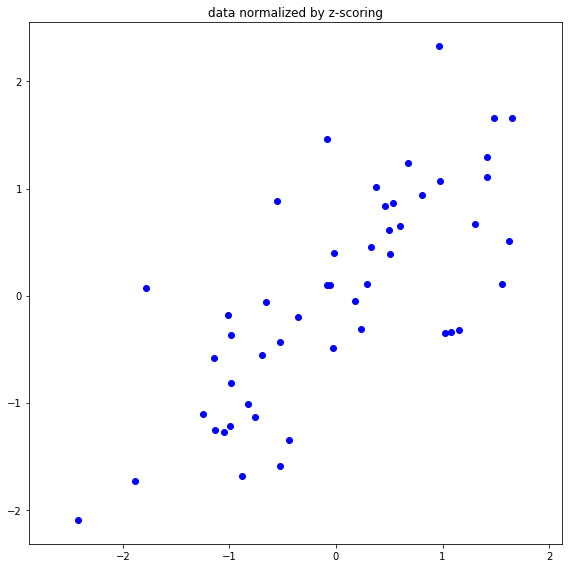

In [231]:
x_m , y_m = np.mean(feature,axis=0)
print('mean of x = ',x_m)
print('mean of y = ',y_m)
x_std, y_std = np.std(feature,axis=0)
print('std of x = ',x_std)
print('std of y = ',y_std)

x = (x-x_m)/x_std
y = (y-y_m)/y_std

n_feature = np.zeros((number_data,number_feature))
n_feature[:,0]=x
n_feature[:,1]=y

def plot_normalization_point(feature,x,y):
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')

    plt.scatter(x,y, c="b", marker="o")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    
    #return feature

plot_normalization_point(n_feature,x,y)

## compute covariance matrix

In [232]:
def compute_covariance(feature):
    
    Sigma = (1/number_data) * np.dot(feature.T,feature)
    
    return Sigma

## compute principal directions

In [233]:
def compute_eigen(X):
    
    S,U = np.linalg.eig(X)

    return S, U

In [234]:

Sigma = compute_covariance(n_feature)
#print(Sigma)
#print(np.cov(feature, rowvar = False))
#print()
S,U = compute_eigen(Sigma)
#print(S,U)

# 고유치가 큰 순서대로 S,U함수 정렬 -> first second principal axis 뽑기 위함.
idx = S.argsort()[::-1]
S=S[idx]
U = U[:,idx]
print(S)
print(S[0])
print(S[1])
print(U)

#print(U[:,np.argmax(S)])
#print(U[:,np.argmin(S)])

#first_eig_vec = U[:,np.argmax(S)]
#second_eig_vec = U[:,np.argmin(S)]
first_eig_vec = U[:,0]
second_eig_vec = U[:,1]

[1.73553 0.26447]
1.7355300038440324
0.26446999615596745
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


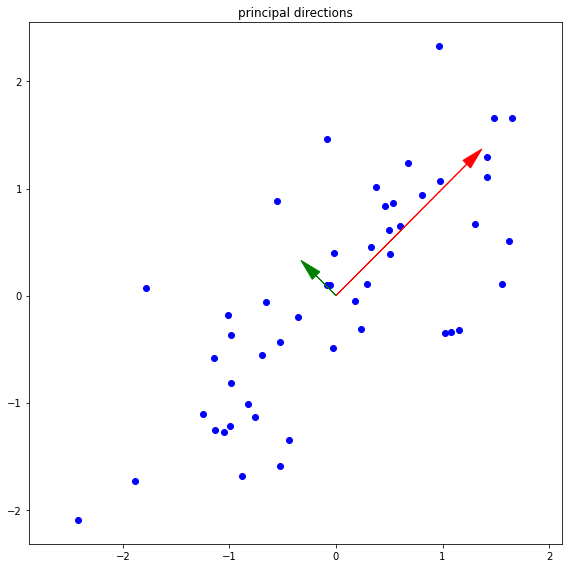

In [235]:
def principal_direction(feature):
    plt.figure(figsize=(8,8))
    plt.title('principal directions')

    plt.scatter(feature[:,0],feature[:,1], c="b", marker="o")
    
    plt.arrow(0, 0, S[0]*first_eig_vec[0], S[0]*first_eig_vec[1],  head_width = 0.1, head_length = 0.2,color = 'red')
    plt.arrow(0, 0, S[1]*second_eig_vec[0], S[1]*second_eig_vec[1],   head_width = 0.1, head_length = 0.2, color = 'green')

    plt.axis('equal')
    plt.tight_layout()
    plt.show()

principal_direction(n_feature)


## first principal axis

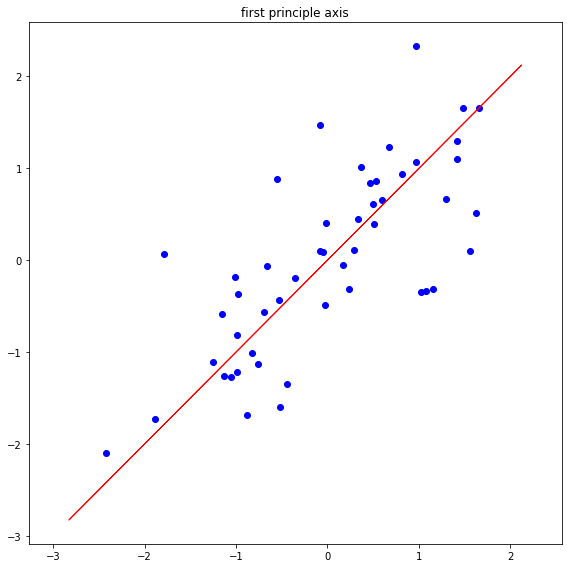

In [236]:
def first_principal_axis(feature):
    plt.figure(figsize=(8,8))
    plt.title('first principle axis')

    plt.scatter(feature[:,0],feature[:,1], c="b", marker="o")
    plt.arrow(-4*first_eig_vec[0],-4*first_eig_vec[1], 7*first_eig_vec[0], 7*first_eig_vec[1],  color = 'red')

    plt.axis('equal')
    plt.tight_layout()
    plt.show()

first_principal_axis(n_feature)

## second principal axis

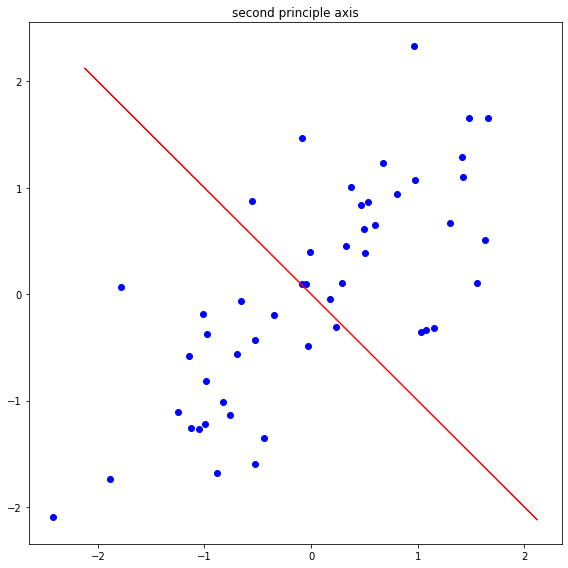

In [237]:
def second_principal_axis(feature):
    plt.figure(figsize=(8,8))
    plt.title('second principle axis')
    plt.scatter(feature[:,0],feature[:,1], c="b", marker="o")
    plt.arrow(-3*second_eig_vec[0],-3*second_eig_vec[1], 6*second_eig_vec[0], 6*second_eig_vec[1],  color = 'red')

    plt.tight_layout()
    plt.show()
    
second_principal_axis(n_feature)

## compute the projection of point onto the line

In [238]:
def compute_projection_onto_line(feature, vector):
    vector_norm2 = np.dot(vector.T,vector)
    
    projection = np.zeros((number_data,number_feature))
    for i in range(number_data):
        projection[i]=(np.dot(feature[i],vector)/vector_norm2)*vector

    
    return projection

## projcet to the first principal axis

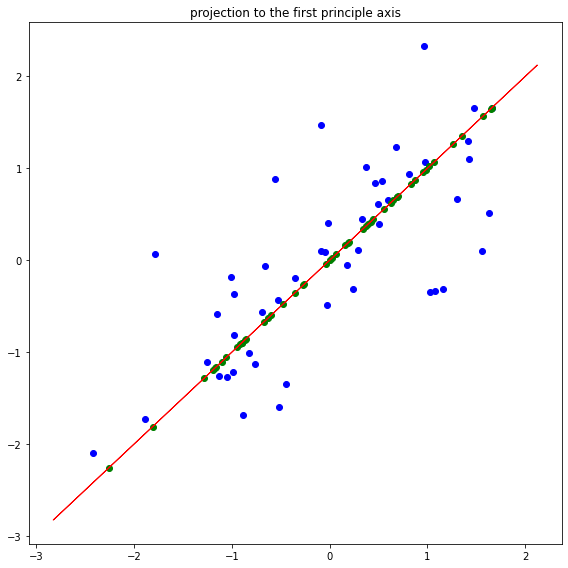

In [239]:
def projection_to_the_first_principal_axis(feature):
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')

    projection_first_data = compute_projection_onto_line(feature,first_eig_vec)
    plt.scatter(x,y, c="b", marker="o")
    plt.arrow(-4*first_eig_vec[0],-4*first_eig_vec[1], 7*first_eig_vec[0], 7*first_eig_vec[1],  color = 'red')
    plt.scatter(projection_first_data[:,0],projection_first_data[:,1], c="g", marker="o")



    plt.tight_layout()
    plt.show()

projection_to_the_first_principal_axis(n_feature)

## projcet to the second principal axis

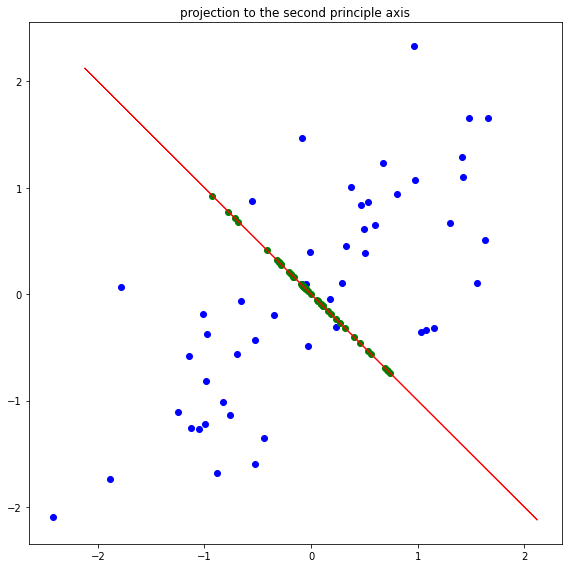

In [240]:
def projection_to_the_second_principal_axis(feature):
    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    projection_second_data = compute_projection_onto_line(feature,second_eig_vec)

    plt.scatter(x,y, c="b", marker="o")
    plt.arrow(-3*second_eig_vec[0],-3*second_eig_vec[1], 6*second_eig_vec[0], 6*second_eig_vec[1],  color = 'red')
    plt.scatter(projection_second_data[:,0],projection_second_data[:,1], c="g", marker="o")


    plt.tight_layout()
    plt.show()
    
projection_to_the_second_principal_axis(n_feature)

## connect original data to the projection onto the first principal axis

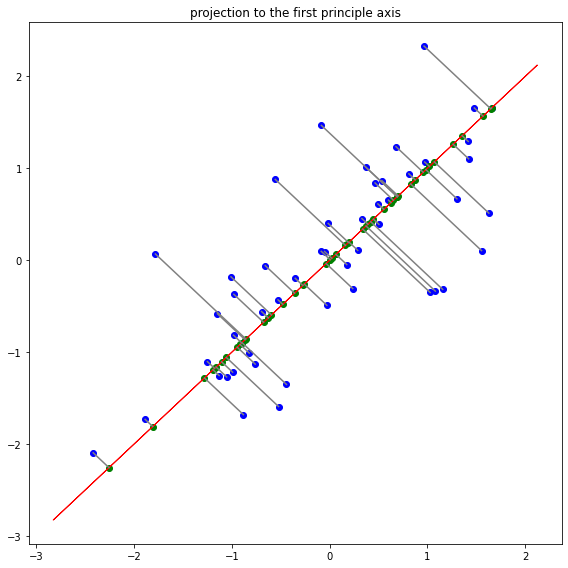

In [241]:
def connect_original_data_to_the_projection_onto_the_first_principal_axis(feature):
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')

    projection_first_data = compute_projection_onto_line(feature,first_eig_vec)
    plt.scatter(x,y, c="b", marker="o")
    plt.arrow(-4*first_eig_vec[0],-4*first_eig_vec[1], 7*first_eig_vec[0], 7*first_eig_vec[1],  color = 'red')
    plt.scatter(projection_first_data[:,0],projection_first_data[:,1], c="g", marker="o")

    for i in range(number_data):
        plt.plot([feature[i,0],projection_first_data[i,0]],[feature[i,1],projection_first_data[i,1]],c = 'gray')


    plt.tight_layout()
    plt.show()

connect_original_data_to_the_projection_onto_the_first_principal_axis(n_feature)

## connect original data to the projection onto the second principal axis

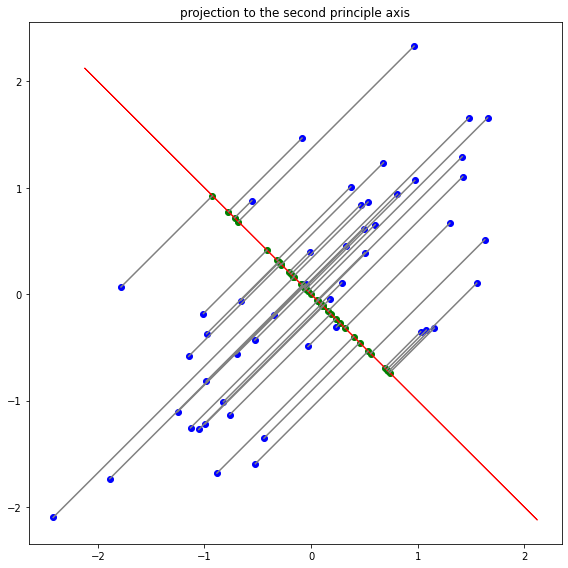

In [242]:
def connect_original_data_to_the_projection_onto_the_second_principal_axis(feature):

    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    projection_second_data = compute_projection_onto_line(feature,second_eig_vec)
    plt.scatter(x,y, c="b", marker="o")
    plt.arrow(-3*second_eig_vec[0],-3*second_eig_vec[1], 6*second_eig_vec[0], 6*second_eig_vec[1],  color = 'red')
    plt.scatter(projection_second_data[:,0],projection_second_data[:,1], c="g", marker="o")

    for i in range(number_data):
        plt.plot([feature[i,0],projection_second_data[i,0]],[feature[i,1],projection_second_data[i,1]],c = 'gray')


    plt.tight_layout()
    plt.show()
    
    
connect_original_data_to_the_projection_onto_the_second_principal_axis(n_feature)

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***

# results

***

### 1. plot the input data after the normalization using Z-scoring in blue

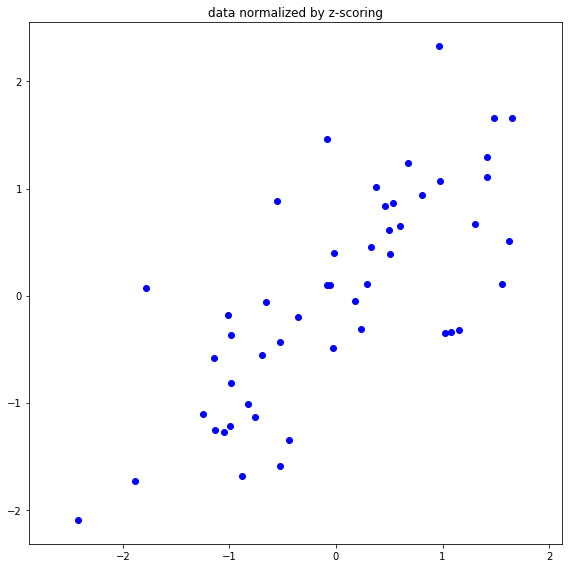

In [243]:
plot_normalization_point(n_feature,x,y)

***

### 2. plot the first principal component in red and the second principal components in green on the normalized data in blue

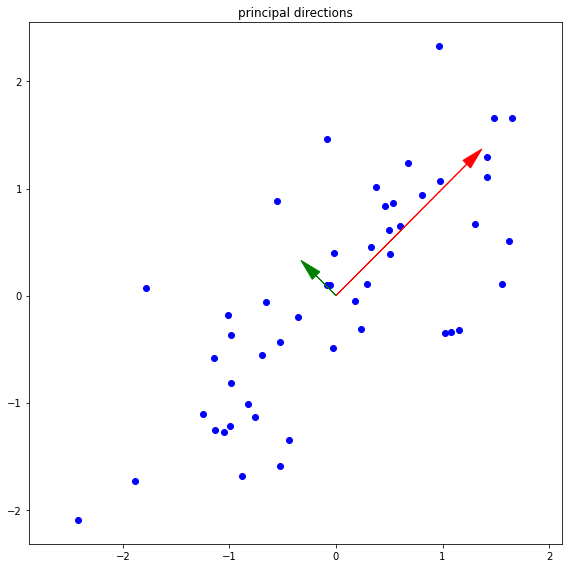

In [244]:
principal_direction(n_feature)

***

### 3. plot the first principal axis in red on the normalized data in blue

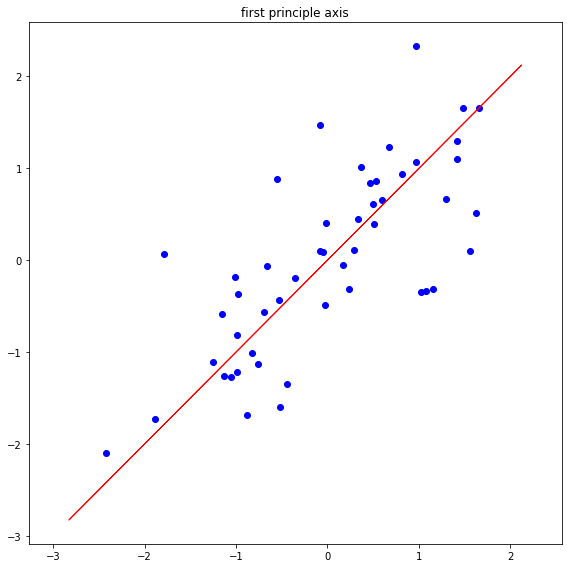

In [245]:
first_principal_axis(n_feature)

***

### 4. plot the second principal axis in red on the normalized data in blue

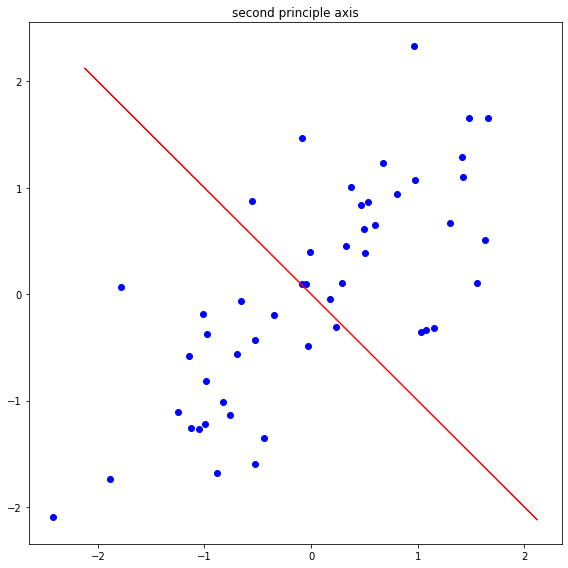

In [246]:
second_principal_axis(n_feature)

***

### 5. plot the projection of data in green onto the first principal axis in red

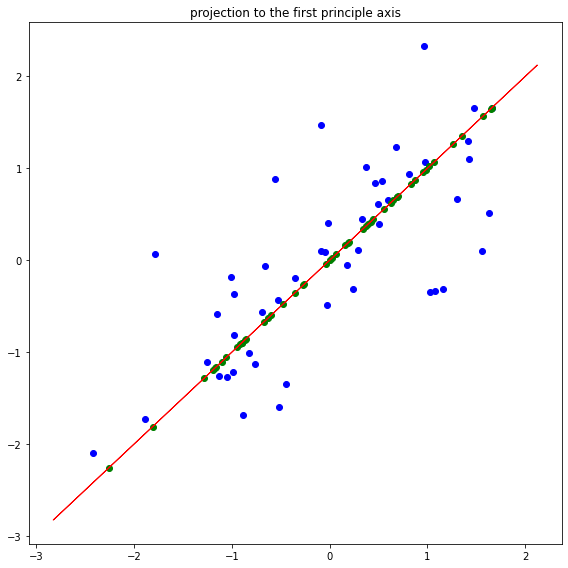

In [247]:
projection_to_the_first_principal_axis(n_feature)

***

### 6. plot the projection of data in green onto the second principal axis in red

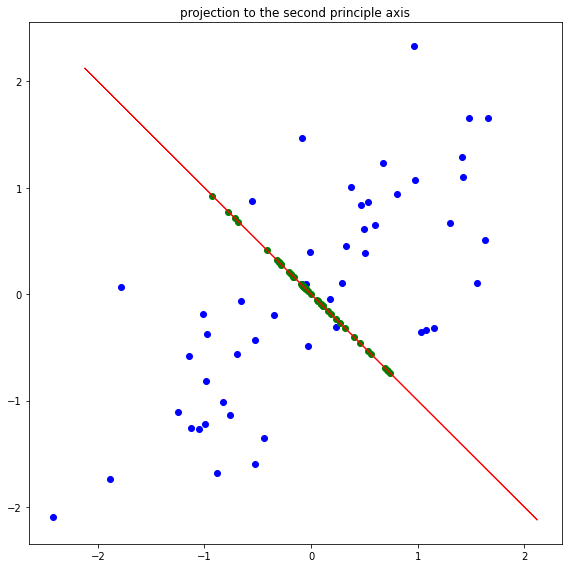

In [248]:
projection_to_the_second_principal_axis(n_feature)

***

### 7. plot the projection line in grey onto the first principal axis

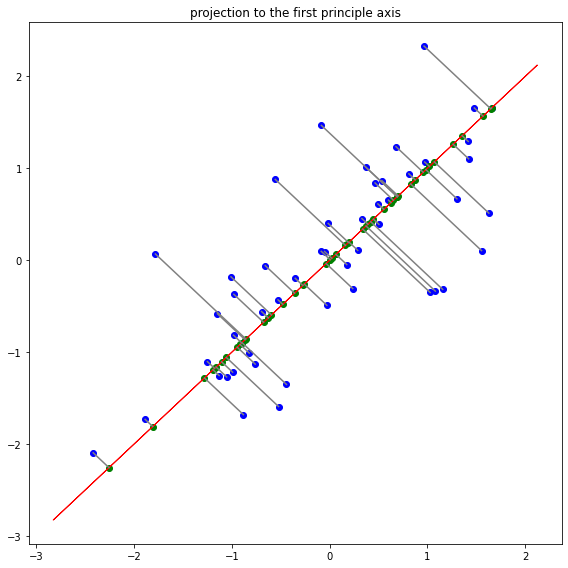

In [249]:
connect_original_data_to_the_projection_onto_the_first_principal_axis(n_feature)

***

### 8. plot the projection line in grey onto the second principal axis

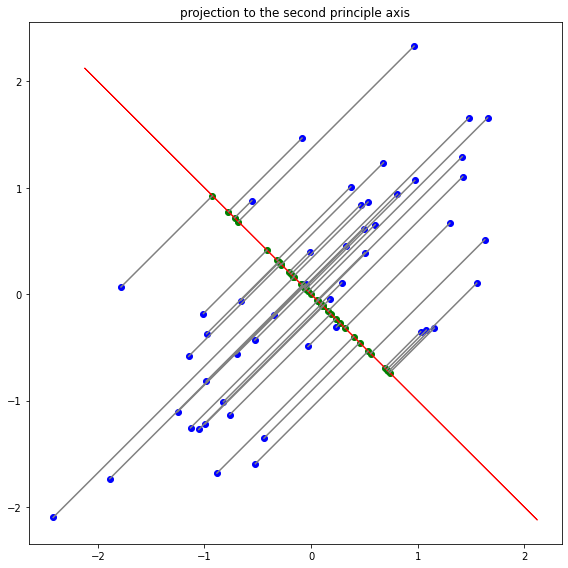

In [250]:
connect_original_data_to_the_projection_onto_the_second_principal_axis(n_feature)

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***